## Data pre processing

Steps to clean data
1. Data encoding
2. Data Normalisation/Standardization
3. Data Cleaning

### Data encoding
Encoding means to encode str to integer values

1. level encoding
2. One hot encoding



In [27]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

iris=pd.read_csv('/home/rishav/Desktop/globsyn-python-intern-training/Dataset/iris.csv')   
tips=pd.read_csv('/home/rishav/Desktop/globsyn-python-intern-training/Dataset/tips.csv')

In [28]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Encoding

using replace function

dataframe. replace ([indexes],[relacing values])

In [29]:
d=['dog','dog','cat','dog','dog','dog','dog','cat','mouse','bird']
s1=pd.Series(d, name='animal')
s2 = s1.replace(['dog', 'cat', 'mouse', 'bird'], [1, 2, 3, 4])
print(s2)

0    1
1    1
2    2
3    1
4    1
5    1
6    1
7    2
8    3
9    4
Name: animal, dtype: int64


/tmp/ipykernel_6897/3359992075.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s2 = s1.replace(['dog', 'cat', 'mouse', 'bird'], [1, 2, 3, 4])


Factorize returns a pandas.index (tuple) of 2 entries values, unique categories
- [0] is the categories in number format
- [1] is the categories

In [30]:
values,unique = s1.factorize()
print(values,unique)

[0 0 1 0 0 0 0 1 2 3] Index(['dog', 'cat', 'mouse', 'bird'], dtype='object')


replacing the iris data set inplace the species with factorized values

In [31]:
iris['species'] = iris['species'].factorize()[0]
print(iris)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [32]:
tips.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


**factorize cannot replace multiple columns at once**
We need to repeat the process for each cell


In [33]:
tips['sex']=tips['sex'].factorize()[0]
tips['smoker']=tips['smoker'].factorize()[0]
tips['day']=tips['day'].factorize()[0]
tips['time']=tips['time'].factorize()[0]    
print(tips)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    0     0     2
1         10.34  1.66    1       0    0     0     3
2         21.01  3.50    1       0    0     0     3
3         23.68  3.31    1       0    0     0     2
4         24.59  3.61    0       0    0     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    2     0     2

[244 rows x 7 columns]


### Ordinal encoder 
It encodes a dataframe into a array like structure which has values encoded as number using fitting logic (refer documentation)
it is a part of sklearn.preprocessing the object are native to the dataset used for pre processing new objects shall be created for each dataframe

to replace the changes into dataframe either transform the value size reshape it or replace the dataframe['index']= encoded_columns
encoded_columns are found by object.fit_transform(dataframe[[array of indexes]])

fit and transform are also seperate functions

In [34]:
#reshape !!
#iris=oe.fit_transform(iris['species'].reshape(iris.size,))
oe=OrdinalEncoder()
encoded_columns=oe.fit_transform(iris[['species']])
iris['species']=encoded_columns
print(iris)
#float values will be returned

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]


In [35]:
tips=pd.read_csv('/home/rishav/Desktop/globsyn-python-intern-training/Dataset/tips.csv')
tips.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


By default the values are encoded to float datatype can be typecasted into integer format

In [36]:
oeTips=OrdinalEncoder()
encoded_columns = oeTips.fit_transform(tips[['sex', 'smoker', 'day', 'time']]).astype(int)
tips[['sex', 'smoker', 'day', 'time']] = encoded_columns
print(tips)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[244 rows x 7 columns]


### One hot encoding
will take values like binary
dog cat bird
1   0   0
0   1   0
0   1   0
0   0   0
0   0   0
0   1   0

dog = 1 means dog has occured
like that

In [37]:
tips=pd.read_csv('/home/rishav/Desktop/globsyn-python-intern-training/Dataset/tips.csv')
get_dummies=pd.get_dummies(tips,dtype=int)
print(get_dummies)

     total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
0         16.99  1.01     2           1         0          1           0   
1         10.34  1.66     3           0         1          1           0   
2         21.01  3.50     3           0         1          1           0   
3         23.68  3.31     2           0         1          1           0   
4         24.59  3.61     4           1         0          1           0   
..          ...   ...   ...         ...       ...        ...         ...   
239       29.03  5.92     3           0         1          1           0   
240       27.18  2.00     2           1         0          0           1   
241       22.67  2.00     2           0         1          0           1   
242       17.82  1.75     2           0         1          1           0   
243       18.78  3.00     2           1         0          1           0   

     day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
0          0       

### Data normalisation

Reshaping all features to same value

<class 'pandas.core.frame.DataFrame'>


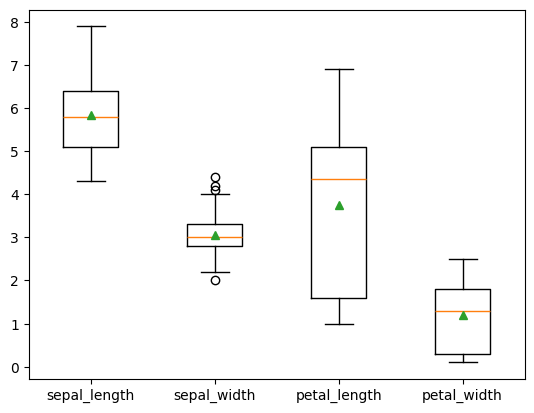

In [44]:
iris_num=iris.drop(['species'],axis=1)
print(type(iris_num))
plt.figure()
plt.boxplot(iris_num,showmeans=True,tick_labels=iris_num.columns)
plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler

scaler is a object of the StandardScaler class
the iris dataset is fit_transformed from **scalar** class not from *pre processing* class hence the data is normalize by this 
the processed data is a numpy.ndarray which can be converted to a pandas dataframe by passing

pd.Dataframe ( ndarray, columns=ndarray.columns)

<class 'numpy.ndarray'>


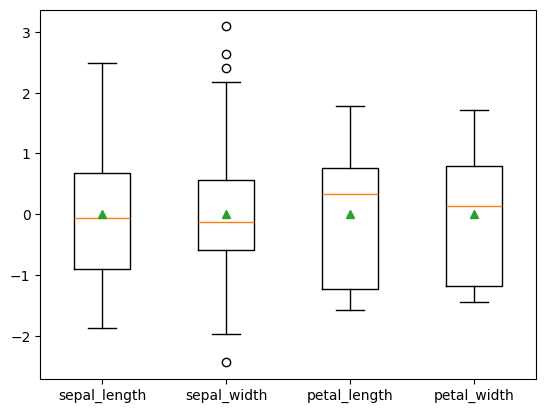

In [40]:
scaler=StandardScaler() #object

iris_scaled=scaler.fit_transform(iris_num) 

print(type(iris_scaled))

iris_scaled=pd.DataFrame(iris_scaled,columns=iris_num.columns)
plt.figure()
plt.boxplot(iris_scaled,showmeans=True,tick_labels=iris_num.columns)
plt.show()


In [41]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
iris_scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00
